In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


/var/folders/cg/72yw7y6n4wxb3jgxj33txbt40000gn/T/ipykernel_55443/2440379995.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_geo, x="ILITOTAL", y="REGION", palette="coolwarm")


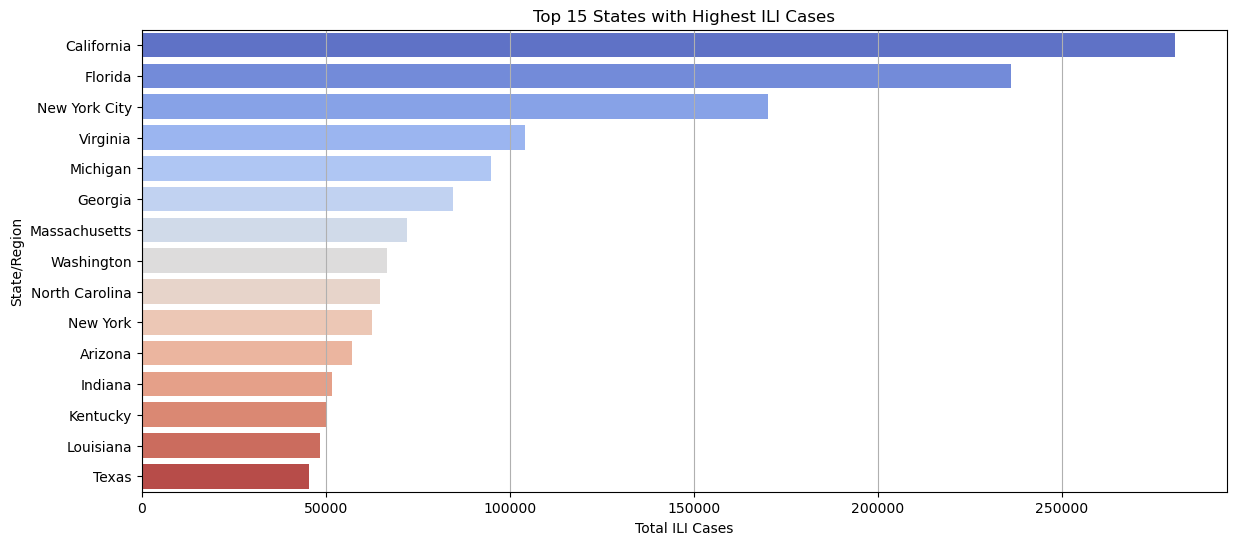

In [2]:
# Load the dataset
file_path = "ILINet.csv"  
df = pd.read_csv(file_path, skiprows=1)  # Skipping the first row if it's a duplicate header

# Replace 'X' with NaN and convert ILITOTAL to numeric
df = df.replace('X', pd.NA)
df["ILITOTAL"] = pd.to_numeric(df["ILITOTAL"], errors="coerce")

# Aggregate ILITOTAL cases by region (state)
df_geo = df.groupby("REGION")["ILITOTAL"].sum().reset_index()

# Sort the states by total cases for better visualization (Top 15)
df_geo = df_geo.sort_values(by="ILITOTAL", ascending=False).head(15)

# Plot the bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=df_geo, x="ILITOTAL", y="REGION", palette="coolwarm")

plt.title("Top 15 States with Highest ILI Cases")
plt.xlabel("Total ILI Cases")
plt.ylabel("State/Region")
plt.grid(axis="x")

# Show the plot
plt.show()




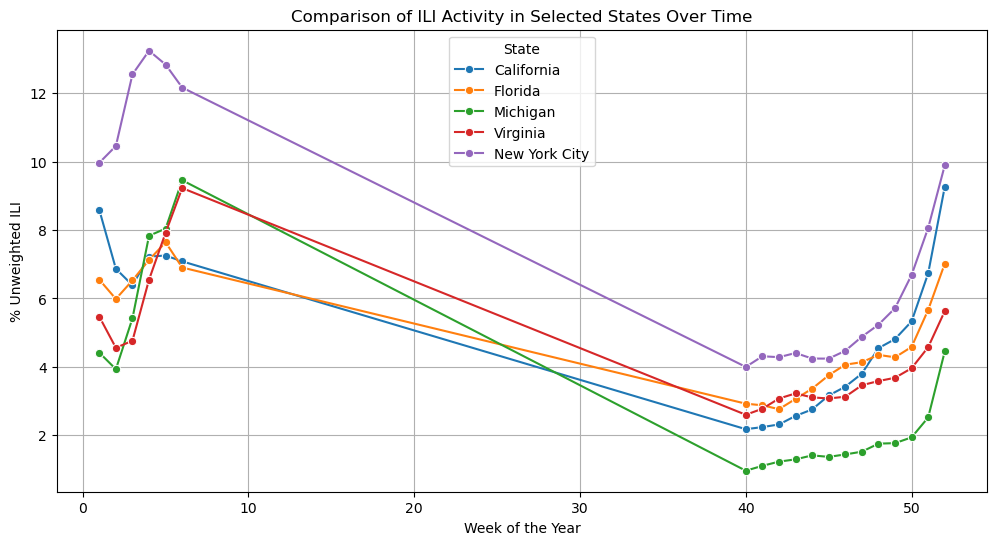

In [3]:
# Replace 'X' with NaN and convert necessary columns to numeric
df = df.replace('X', pd.NA)
df["%UNWEIGHTED ILI"] = pd.to_numeric(df["%UNWEIGHTED ILI"], errors="coerce")
df["YEAR"] = pd.to_numeric(df["YEAR"], errors="coerce")
df["WEEK"] = pd.to_numeric(df["WEEK"], errors="coerce")

# Filter for selected states
selected_states = ["California", "Florida", "New York City", "Virginia", "Michigan"]  # Modify as needed
df_filtered = df[df["REGION"].isin(selected_states)]

# Sort values for proper plotting
df_filtered = df_filtered.sort_values(by=["YEAR", "WEEK"])

# Plot multiple line charts for different states
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_filtered, x="WEEK", y="%UNWEIGHTED ILI", hue="REGION", marker="o")

plt.title("Comparison of ILI Activity in Selected States Over Time")
plt.xlabel("Week of the Year")
plt.ylabel("% Unweighted ILI")
plt.legend(title="State")
plt.grid(True)

plt.show()

In [4]:
region_ili = df_filtered.groupby("REGION")["ILITOTAL"].sum().reset_index()

fig = px.pie(region_ili, names="REGION", values="ILITOTAL",
             title="Distribution of ILI Cases by Region")
fig.show()
